# Online Anomaly Detection

This notebook will show how we can detect anomalies in a streaming data setting using the [River](https://riverml.xyz/latest/) library for onlin machine learning.

In [3]:
from river import anomaly
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

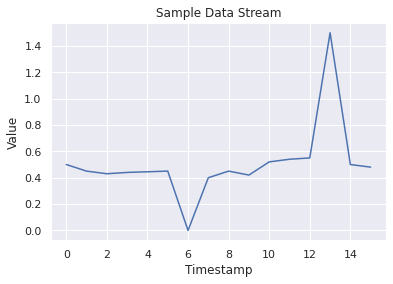

In [29]:
# sample input data
X = [
    0.5,
    0.45,
    0.43,
    0.44,
    0.445,
    0.45,
    0.0,
    0.4,
    0.45,
    0.42,
    0.52,
    0.54,
    0.55,
    1.5,
    0.5,
    0.48,
]

# visualize
sns.lineplot(x=range(len(X)), y=X)
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Sample Data Stream")
plt.show()

In [30]:
# create half space tree
hst = anomaly.HalfSpaceTrees(n_trees=5, height=4, window_size=4, seed=42)

# warm up
for x in X[:4]:
    hst = hst.learn_one({"x": x})  # Warming up

In [31]:
# provide streaming anomaly scores
scores = []
for x in X:
    features = {"x": x}
    hst = hst.learn_one(features)
    # print(f'Anomaly score for x={x:.3f}: {hst.score_one(features):.3f}')
    scores.append(hst.score_one(features))

# visualize

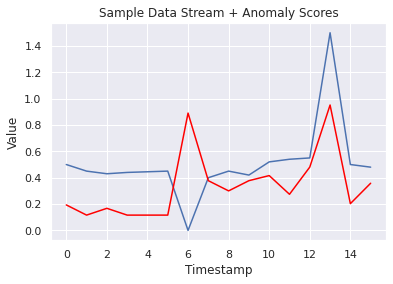

In [32]:
# visualize
sns.lineplot(x=range(len(X)), y=X)
sns.lineplot(x=range(len(X)), y=scores, color="red")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Sample Data Stream + Anomaly Scores")
plt.show()

# Conclusion

As we can see from the above results, the online anomaly detection is able to assign high scores to the manually created outliers and low scores to the inliers.